# Matplotlib and seaborn

Bar charts are used to qualitative variables

Histograms are used to quantitative variables

### What is Tidy Data?

Tidy dataset is a tabular dataset where:

each variable is a column

each observation is a row

each type of observational unit is a table

## Bar Charts

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [31]:
pokemon = pd.read_csv('pokemon.csv')
print(pokemon.shape)
pokemon.head(10)

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


### Create a bar chart

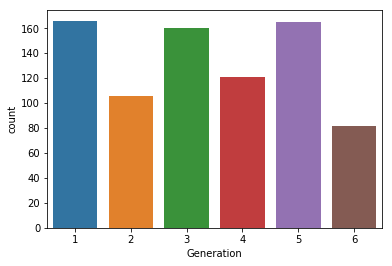

In [32]:
sb.countplot(data = pokemon, x = 'Generation');

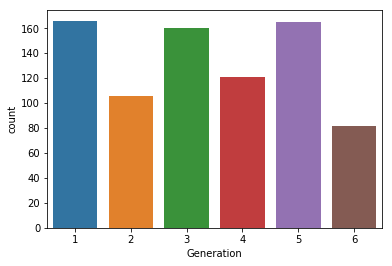

In [33]:
sb.countplot(data = pokemon, x = 'Generation') #if we remove ";" we will see the next

To star working with bars it is better to starby plotting enerithing in one color to avoid being distracted. I will obtain my color value using seaborn´s palette function. This funcion retunrs a list of tuples corresponding to the color pallet set in the function´s arguments.

In [34]:
sb.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [35]:
base_color = sb.color_palette()[0] #the number 0 represent de firs color in the list

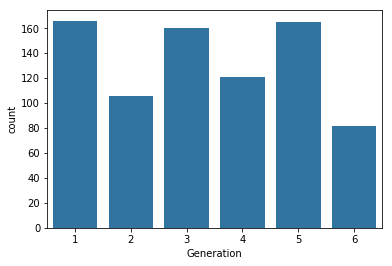

In [36]:
sb.countplot(data = pokemon, x = 'Generation', color = base_color); #add color to add the new color for own bar chart

To order the generation in order by number of pokemon species that where introduced. Than can be done with the order parameter in the countplot function. But before is recomenden to check wich is the order. We are goint to do:

In [37]:
pokemon['Generation'].value_counts().index

Int64Index([1, 5, 3, 4, 2, 6], dtype='int64')

Now, we order the graphic:

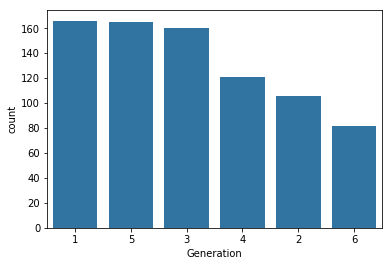

In [38]:
sb.countplot(data = pokemon, x = 'Generation', color = base_color, order = [1, 5, 3, 4, 2, 6]);

Also we can do this:

In [39]:
gen_order = pokemon['Generation'].value_counts().index

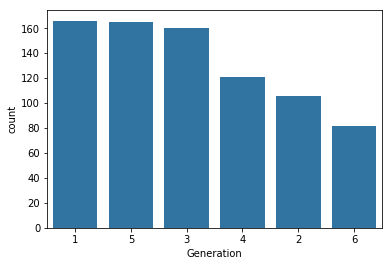

In [40]:
sb.countplot(data = pokemon, x = 'Generation', color = base_color, order = gen_order);

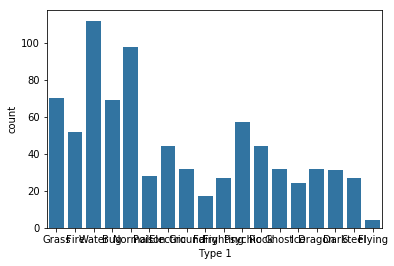

In [41]:
sb.countplot(data = pokemon, x = 'Type 1', color = base_color);

The bar labels on the x axis are mostly unreadable. Can must do a rotation:

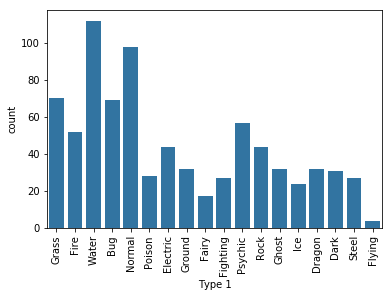

In [42]:
sb.countplot(data = pokemon, x = 'Type 1', color = base_color);
plt.xticks(rotation = 90);

An alternative strategy is to create a horizontal bar chart, it is so simple, the only thing we have to do is to change the parameter x in the sb.countplot function by Y.

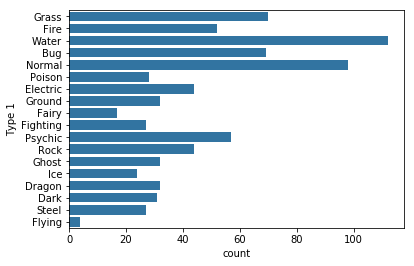

In [43]:
sb.countplot(data = pokemon, y = 'Type 1', color = base_color);

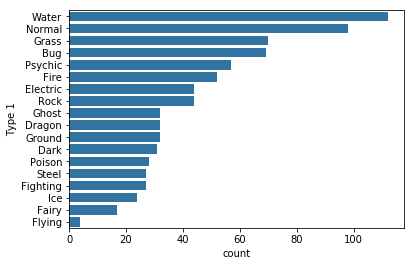

In [44]:
type_order = pokemon['Type 1'].value_counts().index
sb.countplot(data = pokemon, y = 'Type 1', color = base_color, order = type_order);

### Counting missing data

We can use pandas functions to create a table with the number of missing values in each column.

In [45]:
pokemon.isna().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

What if we want to visualize these missing value counts? We could treat the variable names as levels of a categorical variable, and create a resulting bar plot. The data is not in its tidy, unsummarized form, we need to make use of a different plotting function. 

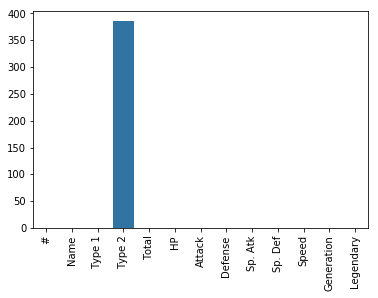

In [46]:
na_counts = pokemon.isna().sum()
base_color = sb.color_palette()[0]
sb.barplot(na_counts.index.values, na_counts, color = base_color);
plt.xticks(rotation = 90);

## Pie Charts

Used to plot relatives frecuencies for qualitative variables.Each are of the cincle represent the relative frecuency of that category. A variant of pie chart is the donut plot. Is very similar except that the center of the circle has been removed. It is dificul to get an accurate estimate of relative frecuency froma pie or a donut plot alone. The bar chart must be the first chooise to plot elements.

When to use pie or donut charts: you only want to use a pie chart if you want to show how the whole of the data is broken down into parts. We shoul plan on only plotting a small number os slices.

You can create a pie chart with matplotlib's pie function. This function requires that the data be in a summarized form: the primary argument to the function will be the wedge sizes.

(-1.1001227242771803, 1.10172903908484, -1.101187905189951, 1.1006638581720694)

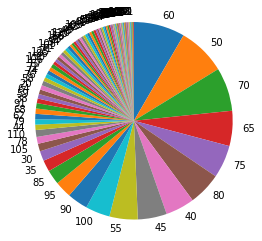

In [47]:
# code for the pie chart seen above
sorted_counts = pokemon['HP'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False);
plt.axis('square')

(-1.1001227242771803, 1.10172903908484, -1.101187905189951, 1.1006638581720694)

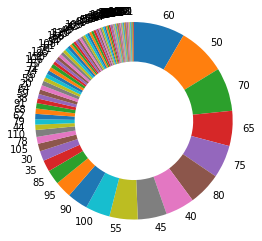

In [48]:
sorted_counts = pokemon['HP'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4});
plt.axis('square')

# DO NOT USE THIS FOR A BIG DATA SET!!! IT WAS JUST AN EXAMPLE

## Histograms

For quatitative variables. Te size of the bins can have a major effect on how you interpret the data. If the bin size is too large we can lost a lot of information abour the overall distribution of data, in the opposite size, a small bin size can introduce a lot of noise.

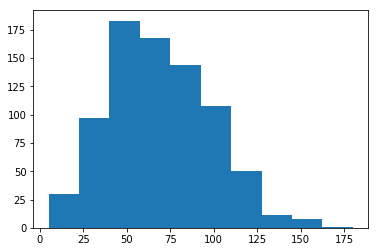

In [51]:
plt.hist(data = pokemon, x = 'Speed');

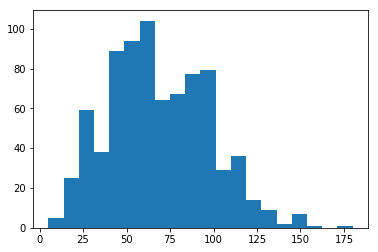

In [52]:
plt.hist(data = pokemon, x = 'Speed', bins = 20);

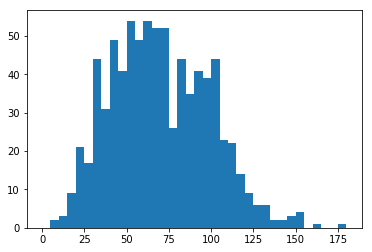

In [57]:
bins = np.arange(0, pokemon['Speed'].max()+5,5)
plt.hist(data = pokemon, x = 'Speed', bins = bins);

/Users/emrentero/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


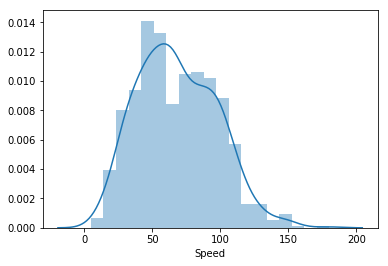

In [60]:
sb.distplot(pokemon['Speed']); 
##the line is a density curve estimate of the data distribution 
##and the total area underneath the curve is set to be = 1

/Users/emrentero/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


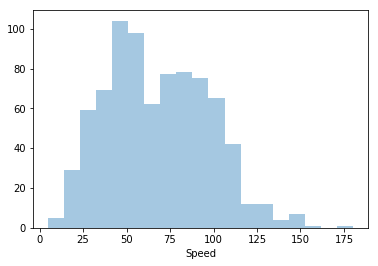

In [61]:
##we can turn of the density curve by setting the parameters "kde = False":
sb.distplot(pokemon['Speed'], kde = False); 